In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from datetime import datetime
pd.options.display.max_rows = 100

In [2]:
df = pd.read_csv('full_dataset.csv',index_col=False)
df = df.drop(['Unnamed: 0'],axis=1)

df2 = pd.read_csv('5y_weather_forcasts.csv')
df2 = df2.drop(['Unnamed: 0'],axis=1)

# Visualizations

In [3]:
df1 = df
df1.Date = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df1['m'] = [int(x.month) for x in df1.Date]

winter = df1[df1['m'].isin([12, 1, 2])]
spring = df1[df1['m'].isin([3, 4, 5])]
summer = df1[df1['m'].isin([6, 7, 8])]
fall = df1[df1['m'].isin([9, 10, 11])]

In [62]:
def make_season(x):
    if x in [12, 1, 2]:
        return 'winter'
    if x in [3, 4, 5]:
        return 'spring'
    if x in [6, 7, 8]:
        return 'summer'
    if x in [9, 10, 11]:
        return  'fall'
df1['season'] = df1.m.apply(lambda x: make_season(x))

def make_numeric_season(x):
    if x in [12, 1, 2]:
        return 0 # 'winter'
    if x in [3, 4, 5]:
        return 1# 'spring'
    if x in [6, 7, 8]:
        return 2# 'summer'
    if x in [9, 10, 11]:
        return  3# 'fall'
df1['numeric_season'] = df1.m.apply(lambda x: make_numeric_season(x))

Text(0, 0.5, 'Nr. of occurrences')

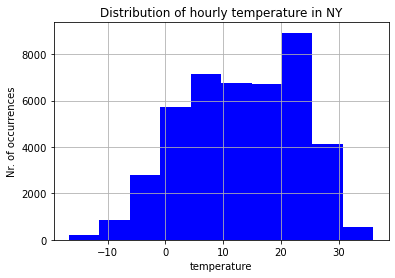

In [50]:
df2.temp.hist(color = 'blue')
plt.title("Distribution of hourly temperature in NY")
plt.xlabel('temperature')
plt.ylabel('Nr. of occurrences')

Text(0, 0.5, 'Nr. of occurrences')

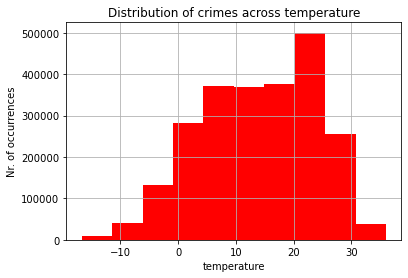

In [51]:
df1.temp.hist(color = 'red')
plt.title("Distribution of crimes across temperature")
plt.xlabel('temperature')
plt.ylabel('Nr. of occurrences')

In [98]:
df1['weekday'] = df1.Date.apply(lambda x: x.day_name())

<AxesSubplot:>

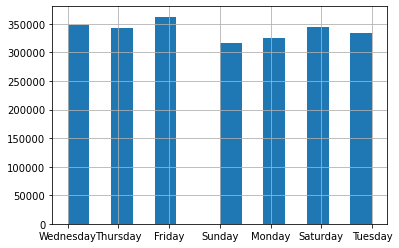

In [114]:
df1.weekday.hist(bins=14)

Text(0, 0.5, 'temperature')

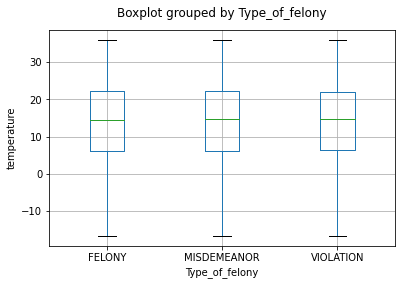

In [59]:
df.boxplot(column=['temp',], by='Type_of_felony')#, figsize=(100, 50))
plt.title('')
plt.ylabel('temperature')

<AxesSubplot:>

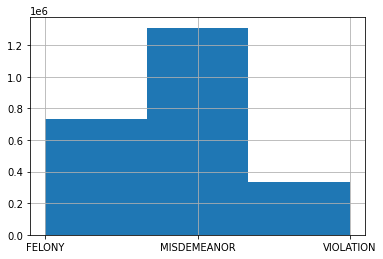

In [70]:
df1.Type_of_felony.hist(bins= 3)

Text(0, 0.5, 'Nr. of occurrences')

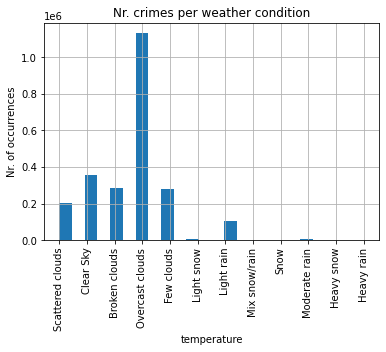

In [42]:
df1.desc.hist(bins=24, xrot=90)
plt.title("Nr. crimes per weather condition")
plt.xlabel('temperature')
plt.ylabel('Nr. of occurrences')

<AxesSubplot:>

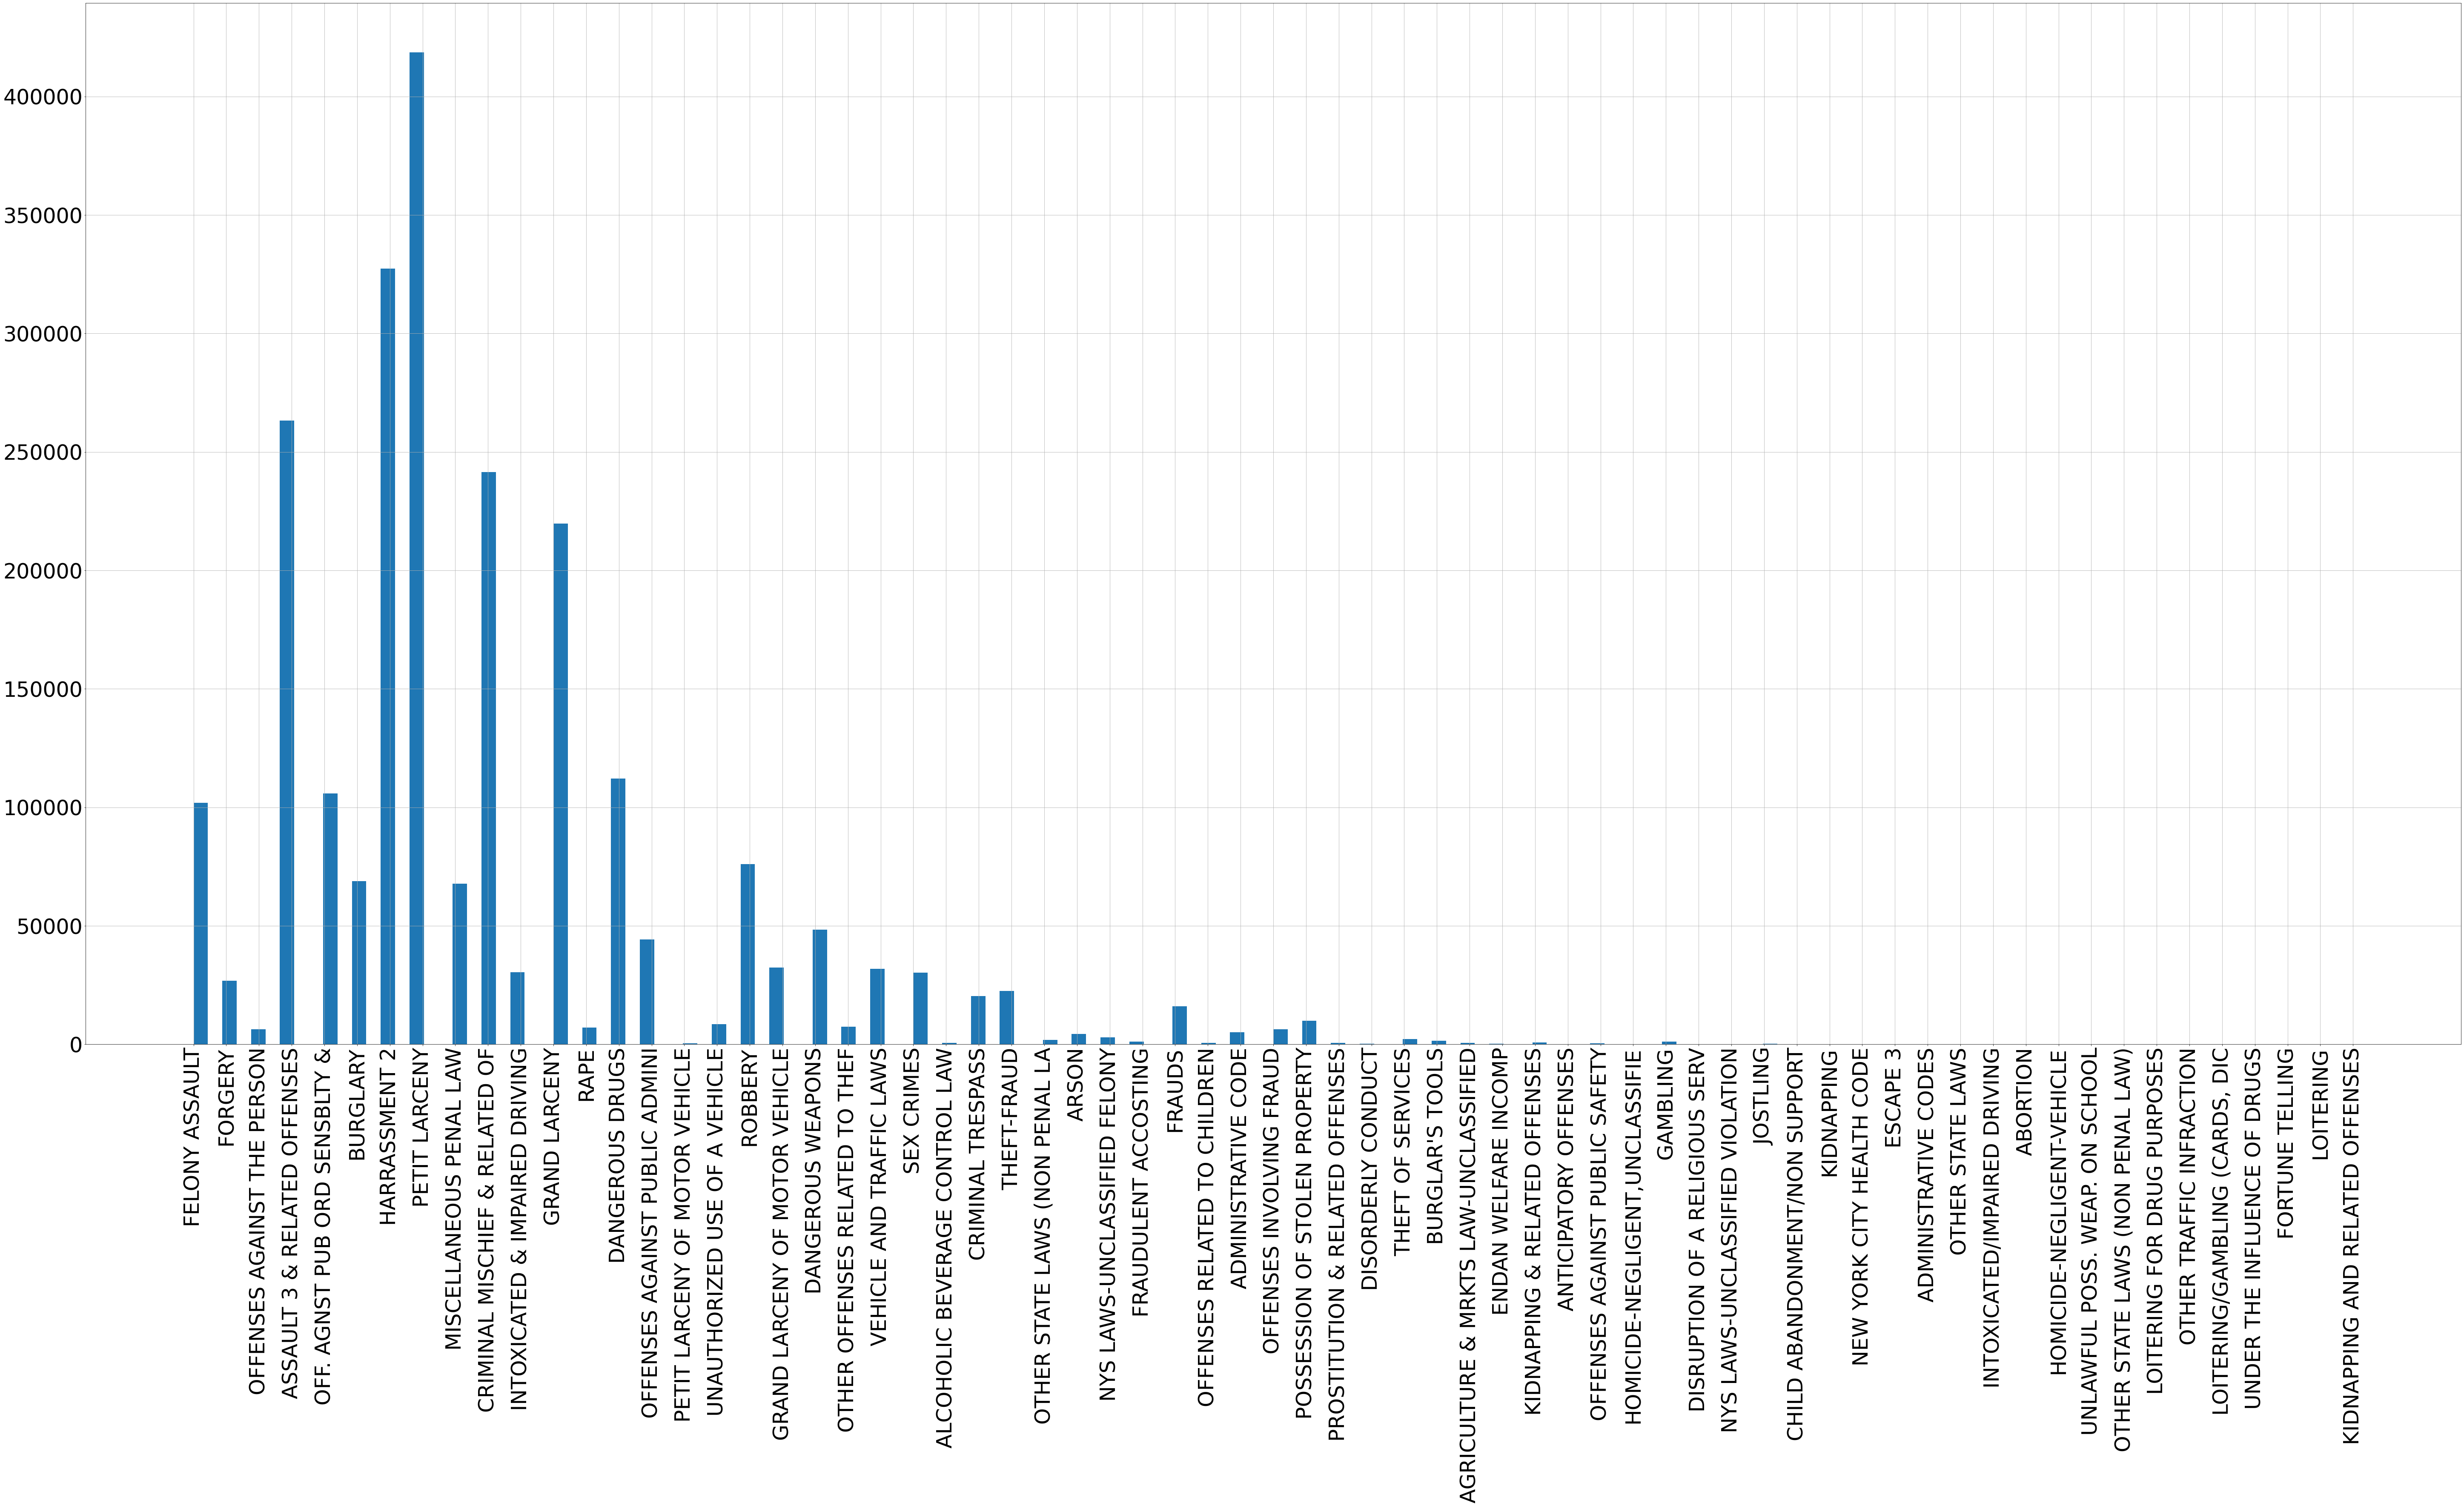

In [53]:
# df.boxplot(column=['temp',], by='Global_desc', figsize=(100, 50), rot=90, fontsize=50)
df1.Global_desc.hist(xrot=90, xlabelsize = 49, bins= 150,figsize=(100,45),ylabelsize= 49)

Text(0, 0.5, 'temperature')

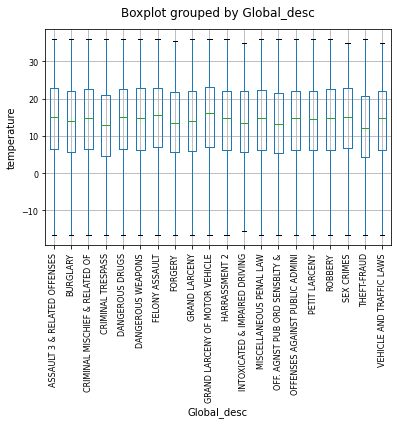

In [72]:
df[df['Global_desc'].isin(df.groupby('Global_desc').size().sort_values(ascending=False)[:20].index)].boxplot(column=['temp',], by='Global_desc', rot=90, fontsize=8)
plt.title('')
plt.ylabel('temperature')

Text(0, 0.5, 'season')

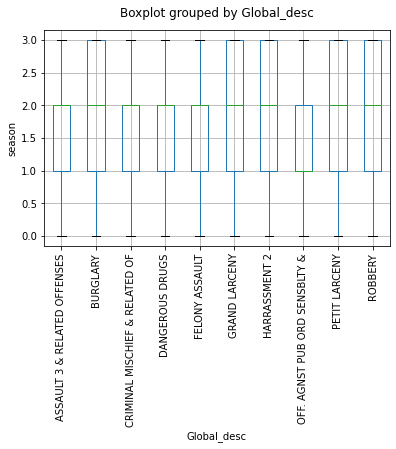

In [63]:
df1[df1['Global_desc'].isin(df.groupby('Global_desc').size().sort_values(ascending=False)[:10].index)].boxplot(column=['numeric_season',], by='Global_desc', rot=90, fontsize=10)
plt.title('')
plt.ylabel('season')


Text(0, 0.5, 'Nr. of occurrences')

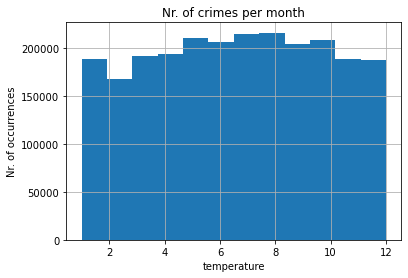

In [43]:
df1.m.hist(bins= 12 )
plt.title("Nr. of crimes per month")
plt.xlabel('temperature')
plt.ylabel('Nr. of occurrences')


Text(0, 0.5, 'Nr. of occurrences')

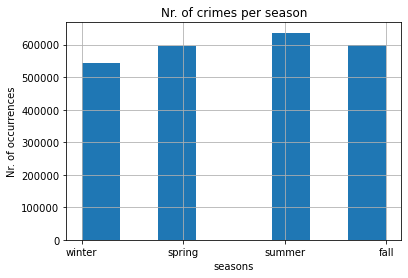

In [44]:
df1.season.hist(bins=8)
plt.title("Nr. of crimes per season")
plt.xlabel('seasons')
plt.ylabel('Nr. of occurrences')

In [107]:
df1.pivot_table(index='Type_of_felony', columns=['weekday'], values=['temp'], aggfunc=count_mean)

temp                                    \
weekday                  Friday           Monday         Saturday   
Type_of_felony                                                      
FELONY          (13.74, 113874)  (13.77, 100976)  (13.76, 106268)   
MISDEMEANOR     (13.69, 199761)  (13.77, 175473)  (13.72, 194256)   
VIOLATION        (13.73, 49003)   (13.77, 48270)   (13.76, 44260)   

                                                                   \
weekday                  Sunday         Thursday          Tuesday   
Type_of_felony                                                      
FELONY            (14.1, 95487)  (14.01, 106184)  (14.15, 103161)   
MISDEMEANOR     (14.01, 176735)  (14.05, 188547)  (14.24, 183556)   
VIOLATION         (14.0, 44648)   (14.12, 48136)   (14.31, 48164)   

                                 
weekday               Wednesday  
Type_of_felony                   
FELONY          (14.21, 107547)  
MISDEMEANOR     (14.22, 192059)  
VIOLATION        (14.37, 49243)

In [111]:
df1.pivot_table(index='Global_desc', columns=['weekday'], values=['temp'], aggfunc=count_mean)

temp                  \
weekday                                       Friday          Monday   
Global_desc                                                            
ABORTION                                   (3.25, 2)      (25.05, 2)   
ADMINISTRATIVE CODE                     (13.95, 776)    (14.29, 756)   
ADMINISTRATIVE CODES                             NaN       (13.5, 1)   
AGRICULTURE & MRKTS LAW-UNCLASSIFIED      (14.0, 84)     (13.47, 72)   
ALCOHOLIC BEVERAGE CONTROL LAW          (14.91, 100)     (20.71, 14)   
ANTICIPATORY OFFENSES                     (15.18, 4)       (9.62, 4)   
ARSON                                   (12.35, 630)    (13.15, 656)   
ASSAULT 3 & RELATED OFFENSES          (14.12, 37465)  (14.16, 35671)   
BURGLAR'S TOOLS                         (13.61, 241)    (13.51, 141)   
BURGLARY                              (13.15, 12212)  (13.17, 10045)   
CHILD ABANDONMENT/NON SUPPORT            (16.69, 16)     (16.72, 21)   
CRIMINAL MISCHIEF & RELATED OF        (13.87, 37795)  (13.95, 32386)   
CRIMINAL TRESPASS                       (12.3, 3222)   (12.47, 2449)   
DANGEROUS DRUGS                       (14.06, 19042)   (14.07, 9226)   
DANGEROUS WEAPONS                      (13.99, 8257)   (13.71, 4236)   
DISORDERLY CONDUCT                        (12.0, 32)     (16.18, 24)   
DISRUPTION OF A RELIGIOUS SERV            (16.65, 6)      (10.35, 2)   
ENDAN WELFARE INCOMP                     (17.29, 21)     (13.89, 29)   
ESCAPE 3                                   (7.93, 7)      (17.38, 6)   
FELONY ASSAULT                        (14.51, 14088)  (14.58, 13631)   
FORGERY                                (13.16, 4327)   (12.95, 2981)   
FORTUNE TELLING                                  NaN             NaN   
FRAUDS                                 (12.78, 2615)   (12.31, 2379)   
FRAUDULENT ACCOSTING                    (11.64, 190)    (10.05, 113)   
GAMBLING                                (20.17, 290)     (19.25, 51)   
GRAND LARCENY                         (13.49, 34903)   (13.4, 32454)   
GRAND LARCENY OF MOTOR VEHICLE         (14.64, 5036)   (15.17, 4722)   
HARRASSMENT 2                         (13.73, 48295)  (13.78, 47747)   
HOMICIDE-NEGLIGENT,UNCLASSIFIE            (17.77, 4)      (11.82, 6)   
HOMICIDE-NEGLIGENT-VEHICLE                       NaN       (21.5, 4)   
INTOXICATED & IMPAIRED DRIVING         (13.51, 4302)   (13.87, 2899)   
INTOXICATED/IMPAIRED DRIVING               (13.6, 4)      (10.35, 6)   
JOSTLING                                 (12.78, 24)     (16.25, 10)   
KIDNAPPING                                (13.05, 4)      (20.59, 7)   
KIDNAPPING & RELATED OFFENSES           (13.95, 116)     (15.6, 103)   
KIDNAPPING AND RELATED OFFENSES                  NaN             NaN   
LOITERING                                        NaN        (9.0, 1)   
LOITERING FOR DRUG PURPOSES                      NaN             NaN   
LOITERING/GAMBLING (CARDS, DIC           (24.06, 17)       (16.3, 2)   
MISCELLANEOUS PENAL LAW               (13.91, 10080)   (13.99, 8771)   
NEW YORK CITY HEALTH CODE                 (14.03, 3)        (8.9, 2)   
NYS LAWS-UNCLASSIFIED FELONY            (12.93, 422)     (12.9, 564)   
NYS LAWS-UNCLASSIFIED VIOLATION           (13.34, 7)      (18.74, 5)   
OFF. AGNST PUB ORD SENSBLTY &         (12.95, 15235)  (12.98, 16458)   
OFFENSES AGAINST PUBLIC ADMINI         (13.82, 6516)   (14.09, 5645)   
OFFENSES AGAINST PUBLIC SAFETY           (18.51, 68)     (16.42, 33)   
OFFENSES AGAINST THE PERSON             (14.64, 987)    (14.39, 749)   
OFFENSES INVOLVING FRAUD               (12.65, 1010)    (13.16, 641)   
OFFENSES RELATED TO CHILDREN            (12.26, 172)             NaN   
OTHER OFFENSES RELATED TO THEF         (13.81, 1185)    (13.77, 885)   
OTHER STATE LAWS                         (15.02, 10)      (17.27, 6)   
OTHER STATE LAWS (NON PENAL LA          (13.88, 282)    (12.71, 171)   
OTHER STATE LAWS (NON PENAL LAW)            (7.8, 2)             NaN   
OTHER TRAFFIC IN

In [86]:
def count_mean(x):
    return (round(np.mean(x),2), len(x))

In [92]:
df[df['Type_of_felony'].isin(df.groupby('Type_of_felony').size().sort_values(ascending=False).index)].pivot_table(index='Type_of_felony', columns=['season'], values=['temp'], aggfunc=count_mean)

temp                                    \
season                     fall           spring           summer   
Type_of_felony                                                      
FELONY          (15.96, 188331)  (11.35, 178194)  (24.19, 195935)   
MISDEMEANOR      (16.0, 325856)  (11.33, 335229)  (24.17, 350663)   
VIOLATION        (15.92, 85027)   (11.32, 82927)   (23.97, 90051)   

                                
season                  winter  
Type_of_felony                  
FELONY          (2.76, 171037)  
MISDEMEANOR     (2.68, 298639)  
VIOLATION        (2.68, 73719)

In [90]:
df1.pivot_table(index='Global_desc', columns=['season'], values=['temp'], aggfunc=count_mean )

temp                   \
season                                           fall           spring   
Global_desc                                                              
ABORTION                                    (22.2, 1)        (12.0, 1)   
ADMINISTRATIVE CODE                     (16.02, 1367)    (11.19, 1203)   
ADMINISTRATIVE CODES                        (10.9, 1)              NaN   
AGRICULTURE & MRKTS LAW-UNCLASSIFIED      (17.1, 139)     (11.67, 107)   
ALCOHOLIC BEVERAGE CONTROL LAW           (16.73, 106)     (13.93, 130)   
ANTICIPATORY OFFENSES                      (12.12, 5)       (10.03, 3)   
ARSON                                   (15.94, 1043)    (10.51, 1165)   
ASSAULT 3 & RELATED OFFENSES           (16.18, 65205)   (11.76, 67238)   
BURGLAR'S TOOLS                           (16.2, 417)      (11.3, 358)   
BURGLARY                               (15.56, 18038)   (10.86, 16043)   
CHILD ABANDONMENT/NON SUPPORT             (17.86, 25)      (11.16, 27)   
CRIMINAL MISCHIEF & RELATED OF         (16.24, 58512)   (11.56, 63098)   
CRIMINAL TRESPASS                       (15.63, 4732)    (10.52, 5588)   
DANGEROUS DRUGS                        (16.96, 27653)   (11.53, 30287)   
DANGEROUS WEAPONS                       (16.6, 11879)   (11.73, 12985)   
DISORDERLY CONDUCT                        (17.11, 71)      (11.86, 65)   
DISRUPTION OF A RELIGIOUS SERV             (15.15, 4)         (9.4, 5)   
ENDAN WELFARE INCOMP                      (17.88, 27)      (11.49, 31)   
ESCAPE 3                                  (15.96, 10)       (9.54, 17)   
FELONY ASSAULT                         (16.34, 25235)   (11.92, 25298)   
FORGERY                                 (15.63, 6753)    (10.79, 7000)   
FORTUNE TELLING                                   NaN        (12.3, 1)   
FRAUDS                                  (15.74, 3735)     (10.1, 4458)   
FRAUDULENT ACCOSTING                     (15.24, 238)      (9.75, 282)   
GAMBLING                                 (18.94, 319)     (14.62, 260)   
GRAND LARCENY                          (15.54, 57583)   (10.99, 52170)   
GRAND LARCENY OF MOTOR VEHICLE           (16.7, 8726)    (12.01, 7376)   
HARRASSMENT 2                          (15.91, 84011)   (11.32, 81704)   
HOMICIDE-NEGLIGENT,UNCLASSIFIE            (15.38, 16)      (11.73, 12)   
HOMICIDE-NEGLIGENT-VEHICLE                 (16.35, 2)        (15.1, 3)   
INTOXICATED & IMPAIRED DRIVING          (15.51, 7374)    (11.43, 8430)   
INTOXICATED/IMPAIRED DRIVING               (16.18, 5)      (12.96, 10)   
JOSTLING                                  (15.52, 52)       (12.4, 47)   
KIDNAPPING                                (17.57, 12)       (10.02, 5)   
KIDNAPPING & RELATED OFFENSES            (14.79, 153)     (12.13, 190)   
KIDNAPPING AND RELATED OFFENSES                   NaN              NaN   
LOITERING                                  (10.87, 3)              NaN   
LOITERING FOR DRUG PURPOSES                       NaN         (0.8, 1)   
LOITERING/GAMBLING (CARDS, DIC            (18.42, 10)      (20.19, 11)   
MISCELLANEOUS PENAL LAW                (16.19, 16849)   (11.44, 17281)   
NEW YORK CITY HEALTH CODE                  (16.25, 8)        (8.07, 3)   
NYS LAWS-UNCLASSIFIED FELONY             (15.68, 793)     (10.44, 730)   
NYS LAWS-UNCLASSIFIED VIOLATION            (17.49, 7)       (14.66, 7)   
OFF. AGNST PUB ORD SENSBLTY &           (15.7, 26162)   (10.54, 27838)   
OFFENSES AGAINST PUBLIC ADMINI         (16.07, 10860)   (11.39, 11686)   
OFFENSES AGAINST PUBLIC SAFETY            (15.65, 42)      (11.24, 61)   
OFFENSES AGAINST THE PERSON             (16.15, 1487)    (11.98, 1655)   
OFFENSES INVOLVING FRAUD                (15.49, 1474)    (10.33, 1730)   
OFFENSES RELATED TO CHILDREN             (16.78, 139)     (12.72, 119)   
OTHER OFFENSES RELATED TO THEF          (15.91, 1851)    (11.36, 1893)   
OTHER STATE LAWS                          (17.04, 16)      (10.97, 18)   
OTHER STATE LAWS (NON PENAL LA           (16.15, 466)

In [88]:
# df.groupby('Global_desc').size().sort_values(ascending=False).pivot_table()
# df[df['Global_desc'].isin(df.groupby('Global_desc').size().sort_values(ascending=False)[:20].index)].pivot_table(index='Global_desc', columns=['season'], values=['temp'], aggfunc=np.mean).plot(rot=90, fontsize = 10)
df[df['Global_desc'].isin(df.groupby('Global_desc').size().sort_values(ascending=False)[:20].index)].pivot_table(index='Global_desc', columns=['season'], values=['temp'], aggfunc=count_mean)

temp                   \
season                                     fall           spring   
Global_desc                                                        
ASSAULT 3 & RELATED OFFENSES     (16.18, 65205)   (11.76, 67238)   
BURGLARY                         (15.56, 18038)   (10.86, 16043)   
CRIMINAL MISCHIEF & RELATED OF   (16.24, 58512)   (11.56, 63098)   
CRIMINAL TRESPASS                 (15.63, 4732)    (10.52, 5588)   
DANGEROUS DRUGS                  (16.96, 27653)   (11.53, 30287)   
DANGEROUS WEAPONS                 (16.6, 11879)   (11.73, 12985)   
FELONY ASSAULT                   (16.34, 25235)   (11.92, 25298)   
FORGERY                           (15.63, 6753)    (10.79, 7000)   
GRAND LARCENY                    (15.54, 57583)   (10.99, 52170)   
GRAND LARCENY OF MOTOR VEHICLE     (16.7, 8726)    (12.01, 7376)   
HARRASSMENT 2                    (15.91, 84011)   (11.32, 81704)   
INTOXICATED & IMPAIRED DRIVING    (15.51, 7374)    (11.43, 8430)   
MISCELLANEOUS PENAL LAW          (16.19, 16849)   (11.44, 17281)   
OFF. AGNST PUB ORD SENSBLTY &     (15.7, 26162)   (10.54, 27838)   
OFFENSES AGAINST PUBLIC ADMINI   (16.07, 10860)   (11.39, 11686)   
PETIT LARCENY                   (15.65, 107291)  (11.16, 101413)   
ROBBERY                          (16.14, 19920)   (11.87, 17469)   
SEX CRIMES                        (16.43, 7593)    (11.66, 7420)   
THEFT-FRAUD                       (15.12, 5274)     (9.64, 6108)   
VEHICLE AND TRAFFIC LAWS          (15.91, 8299)    (11.55, 7833)   

                                                                
season                                   summer         winter  
Global_desc                                                     
ASSAULT 3 & RELATED OFFENSES     (24.47, 71715)  (2.88, 58973)  
BURGLARY                         (23.81, 18050)  (2.37, 16764)  
CRIMINAL MISCHIEF & RELATED OF   (24.36, 65531)  (2.82, 54306)  
CRIMINAL TRESPASS                  (24.0, 4587)   (2.16, 5368)  
DANGEROUS DRUGS                  (24.56, 28698)   (2.7, 25566)  
DANGEROUS WEAPONS                (24.71, 12402)   (2.7, 11084)  
FELONY ASSAULT                   (24.61, 28967)  (2.97, 22440)  
FORGERY                           (24.23, 6436)    (2.6, 6574)  
GRAND LARCENY                    (23.77, 58501)  (2.69, 51553)  
GRAND LARCENY OF MOTOR VEHICLE    (24.82, 9326)   (2.93, 6986)  
HARRASSMENT 2                    (23.97, 88838)  (2.68, 72693)  
INTOXICATED & IMPAIRED DRIVING    (24.66, 7222)   (2.61, 7373)  
MISCELLANEOUS PENAL LAW          (24.28, 18123)   (2.7, 15422)  
OFF. AGNST PUB ORD SENSBLTY &    (23.81, 25912)  (2.36, 25915)  
OFFENSES AGAINST PUBLIC ADMINI   (24.13, 11911)   (2.62, 9753)  
PETIT LARCENY                   (23.86, 115357)  (2.68, 94449)  
ROBBERY                          (24.48, 19851)  (3.05, 18729)  
SEX CRIMES                         (24.4, 8353)   (2.87, 6767)  
THEFT-FRAUD                        (23.0, 5286)   (1.88, 5780)  
VEHICLE AND TRAFFIC LAWS          (24.31, 8394)   (2.91, 7362)

In [58]:
df.pivot_table(index='Type_of_felony', columns=['desc'], values=['temp'], aggfunc=np.mean )

temp                                             \
desc           Broken clouds Clear Sky Few clouds Heavy rain Heavy snow   
Type_of_felony                                                            
FELONY             16.612837  9.653843  15.123051  21.076471  -1.034211   
MISDEMEANOR        16.607925  9.587130  15.036427  20.748175  -0.978528   
VIOLATION          16.600967  9.792054  15.146060  20.956604  -1.017857   

                                                                  \
desc           Light rain Light snow Mix snow/rain Moderate rain   
Type_of_felony                                                     
FELONY          14.942757  -2.699568      1.052354     16.557449   
MISDEMEANOR     14.920042  -2.599257      1.054185     16.354790   
VIOLATION       14.981318  -2.738399      1.050592     16.686563   

                                                           
desc           Overcast clouds Scattered clouds      Snow  
Type_of_felony                                             
FELONY               13.790736        17.188700 -1.196879  
MISDEMEANOR          13.831360        17.206294 -1.135665  
VIOLATION            13.884309        17.119136 -1.343653